# Ploting a NetCDF through Xarray and Magics

## 1) Read the NetCDF in xarray 

In [1]:
import xarray as xr

ds = xr.open_mfdataset('2t.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 91, longitude: 180, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * time       (time) datetime64[ns] 2018-09-24
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<shape=(1, 91, 180), chunksize=(1, 91, 180)>
Attributes:
    Conventions:  CF-1.6
    history:      2018-10-04 16:23:46 GMT by grib_to_netcdf-2.7.3: grib_to_ne...

In [2]:
ds.data_vars

Data variables:
    t2m      (time, latitude, longitude) float32 dask.array<shape=(1, 91, 180), chunksize=(1, 91, 180)>

In [3]:
list(ds.dims)

[u'latitude', u'longitude', u'time']

In [4]:
ds.t2m.attrs

OrderedDict([('units', 'K'), ('long_name', '2 metre temperature')])

In [5]:
ds.time.values

array(['2018-09-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
print(ds.latitude.values[0])
print(ds.latitude.values[1] - ds.latitude.values[0])
print(ds.longitude.values[0])
print(ds.longitude.values[1] - ds.longitude.values[0])

90.0
-2.0
0.0
2.0


In [9]:
type(ds.t2m.values[0])

numpy.ndarray

## 2) Use Magics to plot the content of the Xarray data set

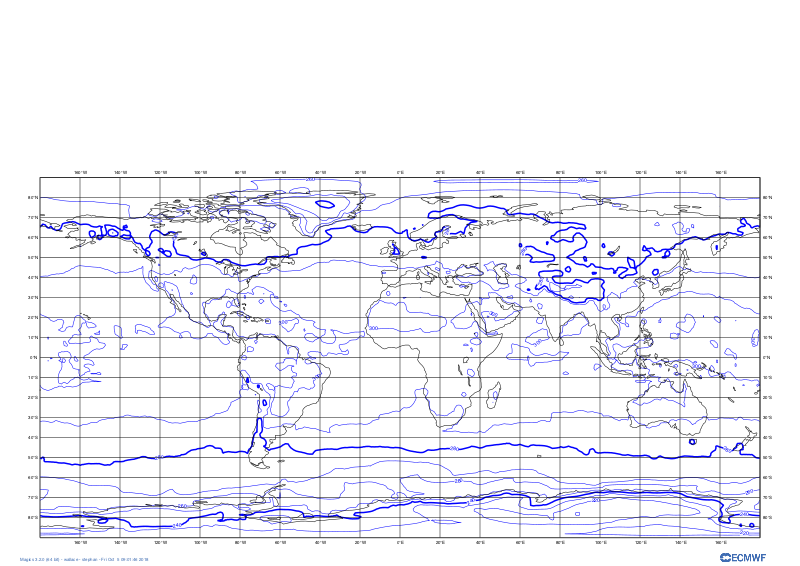

In [11]:
import Magics.macro as magics
import json
import numpy as np


def tomagics(dataset, var):
    values = dataset[var].values.astype(np.float64)
    lat = dataset.latitude.values.astype(np.float64)
    lon = dataset.longitude.values.astype(np.float64)

    data = magics.minput(
        input_field                   = values[0],
        input_field_initial_latitude  = lat[0],
        input_field_latitude_step     = lat[1] - lat[0],
        input_field_initial_longitude = lon[0],
        input_field_longitude_step    = lon[1]-lon[0],
        input_mars_metadata           = json.dumps(dataset[var].attrs)
    )
    return data

contour = magics.mcont( contour_automatic_setting ='ecmwf')

magics.plot(tomagics(ds,"t2m"), contour, magics.mcoast())